# Streaming Stochastic Gradient Descent

In [69]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn aesthetics
sns.despine()
sns.set(color_codes=True)
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 1.5})
sns.set_style("whitegrid")

In [70]:
YS = ('i', 'Time', 'Loss', 'Train Accuracy', 'Test Accuracy')
DIR = '../logs/'
titles = (
    "GD for CIFAR-10",
    "SGD for CIFAR-10",
    "Streaming SGD for CIFAR-10",
    "GD for MNIST",
    "SGD for MNIST",
    "Streaming SGD for MNIST"
)

In [71]:
def load_data(plots):
    iters, times, ys = [], [], []
    for i, filepath in enumerate(plots):
        iters.append([])
        times.append([])
        ys.append([])
        with open(filepath) as f:
            print(filepath)
            next(f)
            for line in csv.reader(f):
                iters[i].append(int(line[0]))
                times[i].append(float(line[1]))
                ys[i].append((float(line[2]), float(line[3]), float(line[4])))
    return iters, times, ys

In [72]:
def plot_x_v_trait(prefix, start, end, trait_index, label_index, xs):
    plt.figure(figsize=(8, 6), dpi=80)
    plt.title(prefix)
    for i, (title, plot) in enumerate(zip(titles[start: end], plots[start: end]), start=start):
        plt.plot(xs[i], [t[trait_index] for t in ys[i]], label=YS[label_index] + ' : ' + title)
    plt.legend(loc='lower right')
    plt.show()

def plot_iterations_v_trait(prefix, start, end, trait_index, label_index):
    plot_x_v_trait(prefix, start, end, trait_index, label_index, iters)
    
def plot_time_v_trait(prefix, start, end, trait_index, label_index):
    plot_x_v_trait(prefix, start, end, trait_index, label_index, times)

# Iterations

In [73]:
ITERS_GD_CIFAR_10_FILEPATH = DIR + 'gd/run-1477724942.769151.csv'
ITERS_SGD_CIFAR_10_FILEPATH = DIR + 'sgd/run-1478063444.454536.csv'
ITERS_SSGD_CIFAR_10_FILEPATH = DIR + 'ssgd/run-1478063455.775432.csv'
ITERS_GD_MNIST_FILEPATH = DIR + 'gd/run-1477725373.309173.csv'
ITERS_SGD_MNIST_FILEPATH = DIR + 'sgd/run-1477888445.484717.csv'
ITERS_SSGD_MNIST_FILEPATH = DIR + 'ssgd/run-1477896168.669955.csv'

plots = (
    ITERS_GD_CIFAR_10_FILEPATH,
    ITERS_SGD_CIFAR_10_FILEPATH,
    ITERS_SSGD_CIFAR_10_FILEPATH,
    ITERS_GD_MNIST_FILEPATH,
    ITERS_SGD_MNIST_FILEPATH,
    ITERS_SSGD_MNIST_FILEPATH
)

In [74]:
iters, times, ys = load_data(plots)

../logs/gd/run-1477724942.769151.csv
../logs/sgd/run-1478063444.454536.csv
../logs/ssgd/run-1478063455.775432.csv
../logs/gd/run-1477725373.309173.csv
../logs/sgd/run-1477888445.484717.csv
../logs/ssgd/run-1477896168.669955.csv


#Iterations v. Accuracy

In [75]:
# Plot iterations v. accuracy (both train and test) for each approach

def plot_iterations_v_train_accuracy(start, end):
    plot_iterations_v_trait("Iterations v. Train Accuracy: ", start, end, 1, 3)
    
def plot_iterations_v_test_accuracy(start, end):
    plot_iterations_v_trait("Iterations v. Test Accuracy: ", start, end, 2, 4)

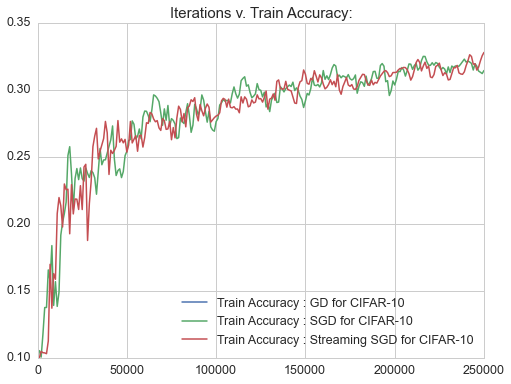

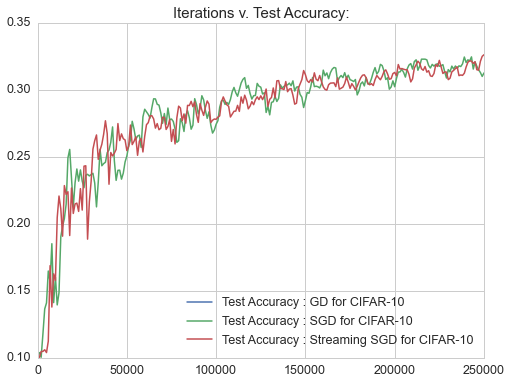

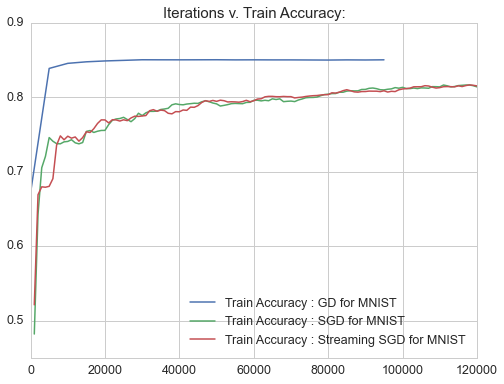

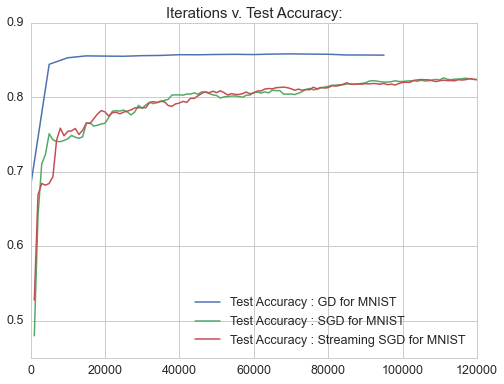

In [76]:
plot_iterations_v_train_accuracy(0, 3)  # CIFAR-10
plot_iterations_v_test_accuracy(0, 3)  # CIFAR-10
plot_iterations_v_train_accuracy(3, 6)  # MNIST
plot_iterations_v_test_accuracy(3, 6)  # MNIST

#Iterations v. Loss

In [77]:
# Plot iterations v. loss for each approach
def plot_iterations_v_loss(start, end):
    plot_iterations_v_trait("Iterations v. Loss: ", start, end, 0, 0)

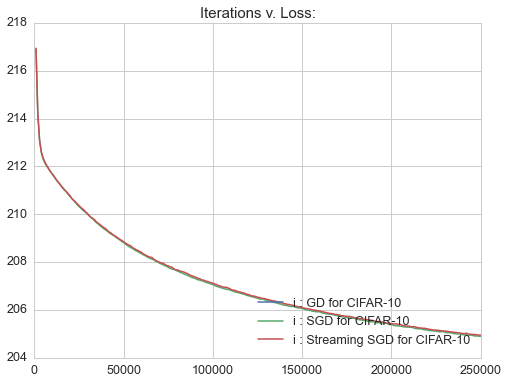

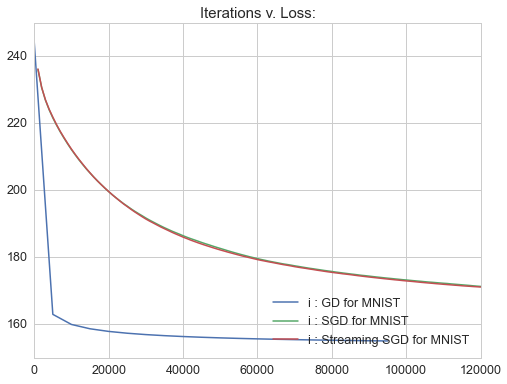

In [78]:
plot_iterations_v_loss(0, 3)  # CIFAR-10
plot_iterations_v_loss(3, 6)  # MNIST

#Time

In [79]:
TIMES_GD_SPAM_FILEPATH = DIR + 'gd/run-1477724942.769151.csv'
TIMES_SGD_SPAM_FILEPATH = DIR + 'sgd/run-1478063444.454536.csv'
TIMES_SSGD_SPAM_FILEPATH = DIR + 'ssgd/run-1478063455.775432.csv'
TIMES_GD_MNIST_FILEPATH = DIR + 'gd/run-1477725373.309173.csv'
TIMES_SGD_MNIST_FILEPATH = DIR + 'sgd/run-1477888445.484717.csv'
TIMES_SSGD_MNIST_FILEPATH = DIR + 'ssgd/run-1477896168.669955.csv'

plots = (
    TIMES_GD_SPAM_FILEPATH,
    TIMES_SGD_SPAM_FILEPATH,
    TIMES_SSGD_SPAM_FILEPATH,
    TIMES_GD_MNIST_FILEPATH,
    TIMES_SGD_MNIST_FILEPATH,
    TIMES_SSGD_MNIST_FILEPATH
)

In [80]:
iters, times, ys = load_data(plots)

../logs/gd/run-1477724942.769151.csv
../logs/sgd/run-1478063444.454536.csv
../logs/ssgd/run-1478063455.775432.csv
../logs/gd/run-1477725373.309173.csv
../logs/sgd/run-1477888445.484717.csv
../logs/ssgd/run-1477896168.669955.csv


#Time v. Accuracy

In [81]:
# Plot time v. accuracy (both train and test) for each approach

def plot_time_v_train_accuracy(start, end):
    plot_time_v_trait("Time v. Train Accuracy: ", start, end, 1, 3)
    
def plot_time_v_test_accuracy(start, end):
    plot_time_v_trait("Time v. Test Accuracy: ", start, end, 2, 4)

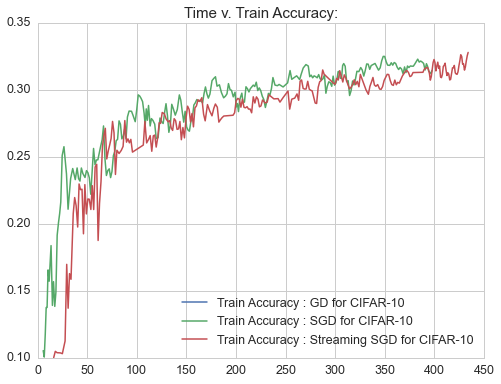

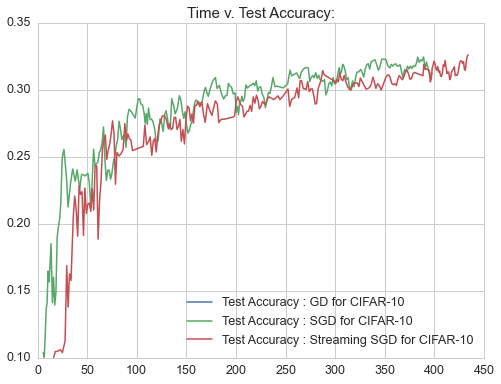

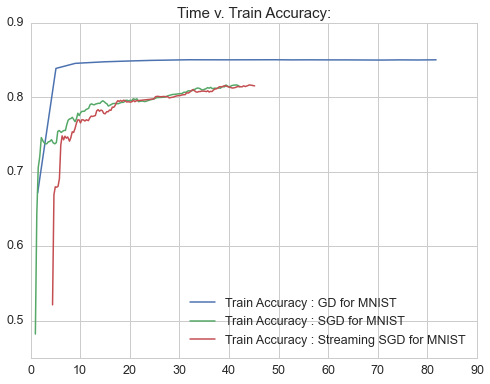

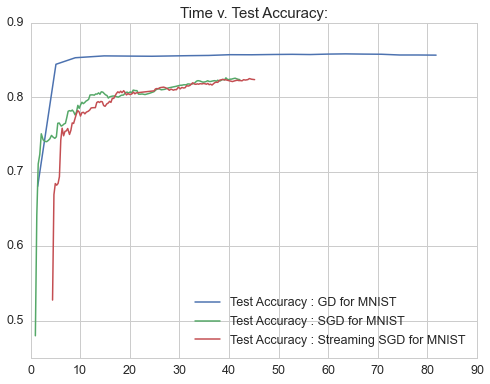

In [82]:
plot_time_v_train_accuracy(0, 3)  # CIFAR-10
plot_time_v_test_accuracy(0, 3)  # CIFAR-10
plot_time_v_train_accuracy(3, 6)  # MNIST
plot_time_v_test_accuracy(3, 6)  # MNIST

#Time v. Loss

In [83]:
# Plot time v. loss for each approach
def plot_time_v_loss(start, end):
    plot_time_v_trait("Time v. Loss: ", start, end, 0, 0)

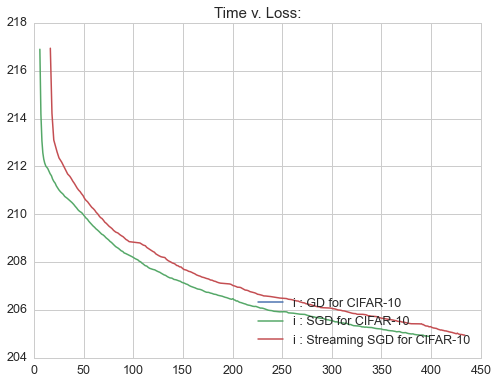

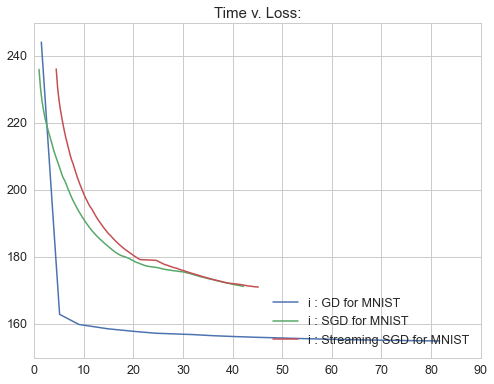

In [84]:
plot_time_v_loss(0, 3)  # CIFAR-10
plot_time_v_loss(3, 6)  # MNIST